In [1]:
import numpy as np
import tensorflow as tf
import os
from PIL import Image
import random

from keras.utils import np_utils
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Flatten, Dense, MaxPooling2D
from keras.layers import BatchNormalization

Using TensorFlow backend.


# Set dimension image

In [ ]:
# set dimension image input (width, hieght)
img_row , img_col = 128, 128


In [ ]:
# Input image
image_path = 'D:\\CU\\Thesis\\CNN model\\' + 'input_data_128_2'

#shuffle 5 bin without monto
# image_path = 'D:\\CU\\Thesis\\CNN model\\' + 'input_data_shuffle'

#shuffle 3 bin with monto
# image_path = '.\\input_data_shuffle_3cat'

# Create image array, dimension is img_row*img_col (gray)

In [2]:
def create_list(image_path):
#create list keep [image,label] receive 2 argument 1. path of all image
    im_matrix = []
    imlist = os.listdir(image_path)
    num_samples = np.size(imlist)
    n = 0
    run = 0
    for file in imlist:
        n = n+1
        im = Image.open(image_path + '\\' + file)
        im2 = np.array(im).flatten()
        im_matrix.append(im2)
        run = n/len(imlist) * 100
        print('Creating image array, processing %.2f' %(run) + '%', end ='\r')

    im_matrix = np.array(im_matrix, dtype = 'f')
    print('Creating image array, processing %.2f' %(run) + '%')

    label = np.ones((num_samples,),dtype = int)
    label[0:num_samples] = 0
    for i in range(len(imlist)):
        if imlist[i][0] == 't':
            label[i] = 1

    train_data = [im_matrix, label]
    print(train_data[0].shape)
    print(train_data[1].shape)
    return train_data


In [ ]:
train_data = create_list(image_path)

# Data Preporcessing

In [ ]:
# batch_size to train
batch_size = 128
# number of output classes
nb_classes = 2
# number of epochs to train
nb_epoch = 100
# number of channels
img_channel = 1


print("already set parameter")

In [ ]:
(X, y) = (train_data[0],train_data[1])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

#Convert 0-255 to 0-1
x_train = x_train/255.0
x_test =  x_test/255.0

#One hot encoding
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

x_train = x_train.reshape(x_train.shape[0],img_row, img_col, 1)
x_test = x_test.reshape(x_test.shape[0],img_row, img_col, 1)

# x_train = x_train.reshape(x_train.shape[0], img_row, img_col)
# x_test = x_test.reshape(x_test.shape[0],img_row, img_col)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print("already split train and test data")


In [ ]:
# convert 1 channel to 3 channel
x_train = np.repeat(x_train[:,:, :, np.newaxis], 3, axis=3)
x_test = np.repeat(x_test[:,:, :, np.newaxis], 3, axis=3)

print('convert 1 channel to 3 channel')
print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
#label [1:0] is normal, label [0:1] is tb
data_label = ['normal', 'tuberculosis']
def check_label(array_label, index_label, data_label):
    # receive array shape size (number of data, number of label)
    label = array_label[index_label]
    for i in range(len(label)):
        if label[i] == 1:
            return data_label[i]


In [ ]:
# check label (if same index = correct)

for index_label in range(y_test.shape[0]):
    print(check_label(y_test, index_label, data_label), index_label)

In [ ]:
# print image for check input data before training

# x_train = np.rollaxis(x_train, 1, 4)
x_test = np.rollaxis(x_test, 3, 1)
index_label = 2
plt.imshow(x_test[index_label,0], interpolation = 'nearest')
plt.show()
print("label :", check_label(y_test, index_label, data_label))


# Create VGG16

In [3]:
from keras.optimizers import SGD
from keras.layers import Activation

In [4]:
def vgg16():
    #Clear variable
    tf.reset_default_graph()

    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_row, img_col, 1), name='block1_conv1'))
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))

    model.add(Conv2D(32, (3, 3), padding='same', name='block1_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

    
    #128
    model.add(Conv2D(64, (3, 3), padding='same', name='block2_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(64, (3, 3), padding='same', name='block2_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

    
    
    #256
    model.add(Conv2D(128, (3, 3), padding='same', name='block3_conv1'))
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))

    model.add(Conv2D(128, (3, 3), padding='same', name='block3_conv2'))
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))

    model.add(Conv2D(128, (3, 3), padding='same', name='block3_conv3'))
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))

    model.add(Conv2D(128, (3, 3), padding='same', name='block3_conv4'))
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

    
    
    #512
    model.add(Conv2D(256, (3, 3), padding='same', name='block4_conv1'))
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))

    model.add(Conv2D(256, (3, 3), padding='same', name='block4_conv2'))
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))

    model.add(Conv2D(256, (3, 3), padding='same', name='block4_conv3'))
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))

    model.add(Conv2D(256, (3, 3), padding='same', name='block4_conv4'))
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

    model.add(Conv2D(256, (3, 3), padding='same', name='block5_conv1'))
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))

    model.add(Conv2D(256, (3, 3), padding='same', name='block5_conv2'))
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))

    model.add(Conv2D(256, (3, 3), padding='same', name='block5_conv3'))
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))

    model.add(Conv2D(256, (3, 3), padding='same', name='block5_conv4'))
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))

    model.add(Flatten())

    model.add(Dense(2048))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(2048, name='fc2'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(nb_classes))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    #Set Optimizer for backpropagation
    sgd = SGD(lr=0.1, decay=0.0001, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

    model.summary()
    return model


In [ ]:
model = vgg16()

# Train CNN Model

In [ ]:
from keras import callbacks

# Callbacks
result_path = './result_vgg16/'
log = callbacks.CSVLogger(result_path + '/training_log.csv')
tb = callbacks.TensorBoard(log_dir=result_path + '/tensorboard-logs',
                           batch_size=batch_size, histogram_freq=0)
checkpoint = callbacks.ModelCheckpoint(result_path + '/weights-{epoch:02d}.h5', monitor='val_acc',
                                       save_best_only=True, save_weights_only=True, verbose=1)
# lr_decay = callbacks.LearningRateScheduler(schedule=lambda epoch: args.lr * (args.lr_decay ** epoch))
print('set callbacks')

In [ ]:
# set epoch
nb_epoch = 300
batch_size = 128

In [ ]:
train = model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=batch_size, epochs=nb_epoch, 
                  callbacks=[log, tb, checkpoint])
print('training complete')

In [ ]:
#save model
model.save_weights(result_path + '/trained_model.h5')
print('Trained model saved to \'%s/trained_model.h5\'' % result_path)

In [ ]:
# Show Model Accuracy on Train and Valiadtion Data
plt.plot(train.history['acc'],color='steelblue')
plt.plot(train.history['val_acc'],color='sandybrown')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# Evaluation

In [ ]:
# Accuracy on Test Data
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
results = model.predict(x_test)

In [ ]:
data_label = ['normal', 'tuberculosis']
def convert_to_label(data):
    max_prob = max(data)
    for i,prob in enumerate(data):
        if prob == max_prob:
            class_index = i
          
    class_label = data_label[class_index]
    return class_label

def image_show(x_test, input_y_test, index):
    pass


def show_test_result(i):
    return "Prediction :" + convert_to_label(results[i])
    #image_show(x_test,input_y_test,i)
    

In [ ]:
for i in range(results.shape[0]):
    print(show_test_result(i), "Actual :", convert_to_label(y_test[i]), i)

In [ ]:
# recall
sum_tb_recall = 0
total = y_test.shape[0]
sum_tb_correct = 0
for i in range(results.shape[0]):
    if convert_to_label(y_test[i]) == 'tuberculosis':
        sum_tb_recall += 1
        if convert_to_label(results[i]) == convert_to_label(y_test[i]):
              sum_tb_correct += 1
        print(show_test_result(i), "Actual :", convert_to_label(y_test[i]), i)
#     print(show_test_result(i), "Actual :", convert_to_label(y_test[i]), i)


print('recall : %.2f%%' %((sum_tb_correct/sum_tb_recall)*100))

In [ ]:
# specificity
sum_tb_specificity = 0
total = y_test.shape[0]
sum_n_correct = 0
for i in range(results.shape[0]):
    if convert_to_label(y_test[i]) == 'normal':
        sum_tb_specificity += 1
        if convert_to_label(results[i]) == convert_to_label(y_test[i]):
              sum_n_correct += 1
        print(show_test_result(i), "Actual :", convert_to_label(y_test[i]), i)
#     print(show_test_result(i), "Actual :", convert_to_label(y_test[i]), i)


print('specificity : %.2f%%' %((sum_n_correct/sum_tb_specificity)*100))

In [ ]:
i = 3
plt.imshow(x_test[i,0], interpolation = 'nearest')
plt.show()
print(show_test_result(i), "Actual :", convert_to_label(y_test[i]))

In [ ]:
input_test_data = create_list(image_path, tb_path)

In [ ]:
data = input_test_data[0].reshape(input_test_data[0].shape[0], 1, img_row, img_col)

In [ ]:
prediction_result = model.predict(data)

# Predict affine image

In [10]:
# img_row , img_col = 28, 28
img_row , img_col = 128, 128
# img_row , img_col = 64, 64
# img_row , img_col = 32, 32

In [5]:
#shuffle  with monto
# image_path = './train_aff_64_1/'
# image_path = './train_aff_64_2/'
# image_path = './train_aff_28_3/'
# image_path = './train_aff_28_4/'
# image_path = './train_aff_28_5/'
image_path = './train/train_32_-10t10_5296/'
# image_path = './train/train_32_-10t10_6620/'

#affine
# affine_path = './affine_image_128/'
# affine_path = './affine_128_4/'
# affine_path = './affine_28_1/'
# affine_path = './test_aff_28_1/'
# affine_path = './test_aff_28_2/'
# affine_path = './test_aff_64_1/'
# affine_path = './test_aff_64_2/'
# affine_path = './test_aff_28_3/'
# affine_path = './test_aff_28_31/'
# affine_path = './test_aff_28_4/'
# affine_path = './test_aff_28_5/'
affine_path = './test/test_aff_32_-10t10_662/'
# affine_path = './test/test_aff_32_-30t30_662/'

#test no affine
# affine_path = './test_noaff_28/'


In [6]:
train_data_aff = create_list(image_path)

Creating image array, processing 100.00%
(5296, 1024)
(5296,)


In [7]:
predict_data = create_list(affine_path)

Creating image array, processing 100.00%
(662, 1024)
(662,)


In [8]:
# Data Preporcessing

# batch_size to train
batch_size = 128
# number of output classes
nb_classes = 2
# number of epochs to train
nb_epoch = 100
# number of channels
img_channel = 1

print("already set parameter")

already set parameter


In [ ]:
#split train 80  val 20 test 20

(X, y) = (train_data_aff[0],train_data_aff[1])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

#Convert 0-255 to 0-1
x_train = x_train/255.0
x_test =  x_test/255.0

#One hot encoding
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

x_train = x_train.reshape(x_train.shape[0],img_row, img_col, 1)
x_test = x_test.reshape(x_test.shape[0],img_row, img_col, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print("already split train and test data")

In [11]:
#train 100 test 20

(x_train, y_train) = (train_data_aff[0],train_data_aff[1])
print('train shape:', x_train.shape, 'train label shape:', y_train.shape)

(x_test, y_test) = (predict_data[0],predict_data[1])
print('test shape:', x_test.shape, 'test label shape:', y_test.shape)

#Convert 0-255 to 0-1
x_train = x_train/255.0
x_test =  x_test/255.0

#One hot encoding
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

x_train = x_train.reshape(x_train.shape[0],img_row, img_col, 1)
x_test = x_test.reshape(x_test.shape[0],img_row, img_col, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print("already split train and test data")

train shape: (5296, 1024) train label shape: (5296,)
test shape: (662, 1024) test label shape: (662,)
already split train and test data


In [12]:
from keras import callbacks

# Callbacks
result_path = './result_vgg16/'
log = callbacks.CSVLogger(result_path + '/training_log.csv')
tb = callbacks.TensorBoard(log_dir=result_path + '/tensorboard-logs',
                           batch_size=batch_size, histogram_freq=0)
checkpoint = callbacks.ModelCheckpoint(result_path + '/weights-{epoch:02d}.h5', monitor='val_acc',
                                       save_best_only=True, save_weights_only=True, verbose=1)
# lr_decay = callbacks.LearningRateScheduler(schedule=lambda epoch: args.lr * (args.lr_decay ** epoch))
print('set callbacks')

set callbacks


In [13]:
# set epoch
nb_epoch = 300
batch_size = 128

In [14]:
model = vgg16()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 32)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 64)        18496     
__________

In [15]:
train = model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=batch_size, epochs=nb_epoch, 
                  callbacks=[log, tb, checkpoint])
print('training complete')

Train on 5296 samples, validate on 662 samples
Epoch 1/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.6697 - acc: 0.6126
Epoch 00001: val_acc improved from -inf to 0.54381, saving model to ./result_vgg16//weights-01.h5
5296/5296 [==============================] - 4s 748us/step - loss: 0.6688 - acc: 0.6137 - val_loss: 0.6934 - val_acc: 0.5438
Epoch 2/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.6204 - acc: 0.6690
Epoch 00002: val_acc improved from 0.54381 to 0.59366, saving model to ./result_vgg16//weights-02.h5
5296/5296 [==============================] - 1s 282us/step - loss: 0.6205 - acc: 0.6692 - val_loss: 0.6650 - val_acc: 0.5937
Epoch 3/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.5893 - acc: 0.6938
Epoch 00003: val_acc improved from 0.59366 to 0.63595, saving model to ./result_vgg16//weights-03.h5
5296/5296 [==============================] - 2s 284us/step - loss: 0.5894 - acc: 0.6937 - val_loss: 0.6703 - val_acc: 0.6

5248/5296 [============================>.] - ETA: 0s - loss: 0.0076 - acc: 0.9996
Epoch 00062: val_acc did not improve
5296/5296 [==============================] - 1s 260us/step - loss: 0.0076 - acc: 0.9996 - val_loss: 0.4023 - val_acc: 0.8822
Epoch 63/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0059 - acc: 1.0000
Epoch 00063: val_acc did not improve
5296/5296 [==============================] - 1s 265us/step - loss: 0.0059 - acc: 1.0000 - val_loss: 0.3757 - val_acc: 0.8958
Epoch 64/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0054 - acc: 1.0000
Epoch 00064: val_acc did not improve
5296/5296 [==============================] - 1s 264us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.3703 - val_acc: 0.8958
Epoch 65/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 1.0000
Epoch 00065: val_acc did not improve
5296/5296 [==============================] - 1s 265us/step - loss: 0.0053 - acc: 1.0000 - val_loss: 0.3719 - v

Epoch 94/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0029 - acc: 1.0000
Epoch 00094: val_acc did not improve
5296/5296 [==============================] - 1s 266us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.4277 - val_acc: 0.9018
Epoch 95/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0027 - acc: 1.0000
Epoch 00095: val_acc did not improve
5296/5296 [==============================] - 1s 262us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.4272 - val_acc: 0.9018
Epoch 96/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0029 - acc: 1.0000
Epoch 00096: val_acc did not improve
5296/5296 [==============================] - 1s 266us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.4308 - val_acc: 0.9003
Epoch 97/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0027 - acc: 1.0000
Epoch 00097: val_acc did not improve
5296/5296 [==============================] - 1s 264us/step - loss: 0.0027 - acc: 1.0000 - val_los

Epoch 126/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0019 - acc: 1.0000
Epoch 00126: val_acc did not improve
5296/5296 [==============================] - 1s 266us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.4578 - val_acc: 0.9048
Epoch 127/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0019 - acc: 1.0000
Epoch 00127: val_acc did not improve
5296/5296 [==============================] - 1s 263us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.4596 - val_acc: 0.9033
Epoch 128/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0020 - acc: 1.0000
Epoch 00128: val_acc did not improve
5296/5296 [==============================] - 1s 259us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.4596 - val_acc: 0.9018
Epoch 129/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0019 - acc: 1.0000
Epoch 00129: val_acc did not improve
5296/5296 [==============================] - 1s 265us/step - loss: 0.0019 - acc: 1.0000 - val

Epoch 158/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0014 - acc: 1.0000
Epoch 00158: val_acc did not improve
5296/5296 [==============================] - 1s 262us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4701 - val_acc: 0.9048
Epoch 159/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 1.0000
Epoch 00159: val_acc did not improve
5296/5296 [==============================] - 1s 264us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4717 - val_acc: 0.9048
Epoch 160/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 1.0000
Epoch 00160: val_acc did not improve
5296/5296 [==============================] - 1s 268us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4725 - val_acc: 0.9048
Epoch 161/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 1.0000
Epoch 00161: val_acc did not improve
5296/5296 [==============================] - 1s 267us/step - loss: 0.0015 - acc: 1.0000 - val

Epoch 190/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0013 - acc: 1.0000
Epoch 00190: val_acc did not improve
5296/5296 [==============================] - 1s 263us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.4713 - val_acc: 0.9048
Epoch 191/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0012 - acc: 1.0000
Epoch 00191: val_acc did not improve
5296/5296 [==============================] - 1s 260us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.4719 - val_acc: 0.9048
Epoch 192/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0012 - acc: 1.0000
Epoch 00192: val_acc did not improve
5296/5296 [==============================] - 1s 262us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.4721 - val_acc: 0.9033
Epoch 193/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0013 - acc: 1.0000
Epoch 00193: val_acc did not improve
5296/5296 [==============================] - 1s 262us/step - loss: 0.0013 - acc: 1.0000 - val

Epoch 222/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0012 - acc: 1.0000
Epoch 00222: val_acc did not improve
5296/5296 [==============================] - 1s 265us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4812 - val_acc: 0.9033
Epoch 223/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0011 - acc: 1.0000
Epoch 00223: val_acc did not improve
5296/5296 [==============================] - 1s 270us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4815 - val_acc: 0.9033
Epoch 224/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0011 - acc: 1.0000
Epoch 00224: val_acc did not improve
5296/5296 [==============================] - 1s 267us/step - loss: 0.0029 - acc: 0.9992 - val_loss: 1.1542 - val_acc: 0.6239
Epoch 225/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0809 - acc: 0.9779
Epoch 00225: val_acc did not improve
5296/5296 [==============================] - 1s 266us/step - loss: 0.0802 - acc: 0.9781 - val

Epoch 254/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0011 - acc: 1.0000
Epoch 00254: val_acc did not improve
5296/5296 [==============================] - 1s 270us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4481 - val_acc: 0.9018
Epoch 255/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0010 - acc: 1.0000
Epoch 00255: val_acc did not improve
5296/5296 [==============================] - 1s 270us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.4500 - val_acc: 0.9033
Epoch 256/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0011 - acc: 1.0000
Epoch 00256: val_acc did not improve
5296/5296 [==============================] - 1s 271us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4512 - val_acc: 0.9048
Epoch 257/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0010 - acc: 1.0000
Epoch 00257: val_acc did not improve
5296/5296 [==============================] - 1s 272us/step - loss: 0.0010 - acc: 1.0000 - val

Epoch 286/300
5248/5296 [============================>.] - ETA: 0s - loss: 9.9875e-04 - acc: 1.0000
Epoch 00286: val_acc did not improve
5296/5296 [==============================] - 1s 260us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.4825 - val_acc: 0.8973
Epoch 287/300
5248/5296 [============================>.] - ETA: 0s - loss: 8.5996e-04 - acc: 1.0000
Epoch 00287: val_acc improved from 0.90785 to 0.90785, saving model to ./result_vgg16//weights-287.h5
5296/5296 [==============================] - 1s 275us/step - loss: 9.1949e-04 - acc: 1.0000 - val_loss: 0.4392 - val_acc: 0.9079
Epoch 288/300
5248/5296 [============================>.] - ETA: 0s - loss: 9.0501e-04 - acc: 1.0000
Epoch 00288: val_acc did not improve
5296/5296 [==============================] - 1s 263us/step - loss: 9.0448e-04 - acc: 1.0000 - val_loss: 0.4518 - val_acc: 0.9048
Epoch 289/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0010 - acc: 1.0000 
Epoch 00289: val_acc did not improve
5296/52

In [16]:
model.save_weights(result_path + '/affine.h5')
print('Trained model saved to \'%s/affine.h5\'' % result_path)

Trained model saved to './result_vgg16//affine.h5'


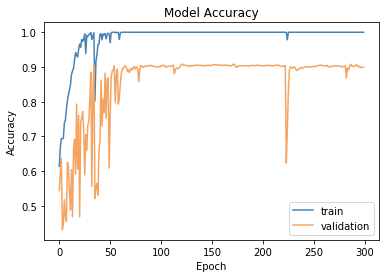

In [17]:
# Show Model Accuracy on Train and Valiadtion Data
plt.plot(train.history['acc'],color='steelblue')
plt.plot(train.history['val_acc'],color='sandybrown')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [18]:
# load weight
path_weight = './result_vgg16/weights-287.h5'
model.load_weights(path_weight)
print('loading weight complete')

loading weight complete


In [27]:
#if load weight

#test affine
# affine_path = './test_aff_28_5/'

#test no affine
# affine_path = './test_noaff_28/'
# affine_path = './test/test_aff_32_-10t10_662/'
affine_path = './test/test_aff_32_-30t30_662/'
predict_data = create_list(affine_path)

Creating image array, processing 100.00%
(662, 1024)
(662,)


In [28]:
(predict_x, predict_y) = (predict_data[0],predict_data[1])

#Convert 0-255 to 0-1
predict_x = predict_x/255.0


#One hot encoding
predict_y = np_utils.to_categorical(predict_y, nb_classes)

#reshape
predict_x = predict_x.reshape(predict_x.shape[0],img_row, img_col, 1)
predict_x = predict_x.astype('float32')


print("Prepare data complete.")

Prepare data complete.


In [29]:
results_affine = model.predict(predict_x)

In [30]:
data_label = ['normal', 'tuberculosis']
def convert_to_label(data):
    max_prob = max(data)
    for i,prob in enumerate(data):
        if prob == max_prob:
            class_index = i
          
    class_label = data_label[class_index]
    return class_label

def image_show(x_test, input_y_test, index):
    pass


def show_test_result(i, results):
    return "Prediction :" + convert_to_label(results[i])
    #image_show(x_test,input_y_test,i)

In [31]:
#Accuracy
correct = 0
total = predict_y.shape[0]

for i in range(results_affine.shape[0]):
    if convert_to_label(results_affine[i]) == convert_to_label(predict_y[i]):
        correct += 1
#     print(show_test_result(i), "Actual :", convert_to_label(predict_y[i]), i)
#     print(show_test_result(i), "Actual :", convert_to_label(predict_y[i]), i)

print('Accuracy : %.2f%%' %((correct/total)*100))

Accuracy : 73.41%


In [32]:
# recall or sensitivity
sum_tb_recall = 0
total = predict_y.shape[0]
sum_tb_correct = 0
for i in range(results_affine.shape[0]):
    if convert_to_label(predict_y[i]) == 'tuberculosis':
        sum_tb_recall += 1
        if convert_to_label(results_affine[i]) == convert_to_label(predict_y[i]):
              sum_tb_correct += 1
        print(show_test_result(i, results_affine), "Actual :", convert_to_label(predict_y[i]), i)
#     print(show_test_result(i), "Actual :", convert_to_label(predict_y[i]), i)


print('recall : %.2f%%' %((sum_tb_correct/sum_tb_recall)*100))

Prediction :normal Actual : tuberculosis 360
Prediction :tuberculosis Actual : tuberculosis 361
Prediction :tuberculosis Actual : tuberculosis 362
Prediction :tuberculosis Actual : tuberculosis 363
Prediction :tuberculosis Actual : tuberculosis 364
Prediction :normal Actual : tuberculosis 365
Prediction :tuberculosis Actual : tuberculosis 366
Prediction :tuberculosis Actual : tuberculosis 367
Prediction :tuberculosis Actual : tuberculosis 368
Prediction :tuberculosis Actual : tuberculosis 369
Prediction :tuberculosis Actual : tuberculosis 370
Prediction :tuberculosis Actual : tuberculosis 371
Prediction :tuberculosis Actual : tuberculosis 372
Prediction :tuberculosis Actual : tuberculosis 373
Prediction :normal Actual : tuberculosis 374
Prediction :tuberculosis Actual : tuberculosis 375
Prediction :tuberculosis Actual : tuberculosis 376
Prediction :tuberculosis Actual : tuberculosis 377
Prediction :tuberculosis Actual : tuberculosis 378
Prediction :tuberculosis Actual : tuberculosis 37

Prediction :tuberculosis Actual : tuberculosis 602
Prediction :tuberculosis Actual : tuberculosis 603
Prediction :tuberculosis Actual : tuberculosis 604
Prediction :tuberculosis Actual : tuberculosis 605
Prediction :normal Actual : tuberculosis 606
Prediction :tuberculosis Actual : tuberculosis 607
Prediction :normal Actual : tuberculosis 608
Prediction :tuberculosis Actual : tuberculosis 609
Prediction :normal Actual : tuberculosis 610
Prediction :tuberculosis Actual : tuberculosis 611
Prediction :tuberculosis Actual : tuberculosis 612
Prediction :tuberculosis Actual : tuberculosis 613
Prediction :tuberculosis Actual : tuberculosis 614
Prediction :tuberculosis Actual : tuberculosis 615
Prediction :tuberculosis Actual : tuberculosis 616
Prediction :tuberculosis Actual : tuberculosis 617
Prediction :tuberculosis Actual : tuberculosis 618
Prediction :tuberculosis Actual : tuberculosis 619
Prediction :tuberculosis Actual : tuberculosis 620
Prediction :tuberculosis Actual : tuberculosis 62

In [33]:
#specification
sum_tb_specificity = 0
total = predict_y.shape[0]
sum_n_correct = 0
for i in range(results_affine.shape[0]):
    if convert_to_label(predict_y[i]) == 'normal':
        sum_tb_specificity += 1
        if convert_to_label(results_affine[i]) == convert_to_label(predict_y[i]):
              sum_n_correct += 1
        print(show_test_result(i, results_affine), "Actual :", convert_to_label(predict_y[i]), i)
#     print(show_test_result(i), "Actual :", convert_to_label(y_test[i]), i)


print('specificity : %.2f%%' %((sum_n_correct/sum_tb_specificity)*100))

Prediction :normal Actual : normal 0
Prediction :tuberculosis Actual : normal 1
Prediction :normal Actual : normal 2
Prediction :tuberculosis Actual : normal 3
Prediction :normal Actual : normal 4
Prediction :tuberculosis Actual : normal 5
Prediction :tuberculosis Actual : normal 6
Prediction :tuberculosis Actual : normal 7
Prediction :tuberculosis Actual : normal 8
Prediction :normal Actual : normal 9
Prediction :normal Actual : normal 10
Prediction :normal Actual : normal 11
Prediction :tuberculosis Actual : normal 12
Prediction :normal Actual : normal 13
Prediction :normal Actual : normal 14
Prediction :normal Actual : normal 15
Prediction :tuberculosis Actual : normal 16
Prediction :tuberculosis Actual : normal 17
Prediction :normal Actual : normal 18
Prediction :normal Actual : normal 19
Prediction :tuberculosis Actual : normal 20
Prediction :tuberculosis Actual : normal 21
Prediction :normal Actual : normal 22
Prediction :normal Actual : normal 23
Prediction :normal Actual : norm

Prediction :tuberculosis Actual : normal 313
Prediction :normal Actual : normal 314
Prediction :tuberculosis Actual : normal 315
Prediction :normal Actual : normal 316
Prediction :normal Actual : normal 317
Prediction :tuberculosis Actual : normal 318
Prediction :normal Actual : normal 319
Prediction :normal Actual : normal 320
Prediction :tuberculosis Actual : normal 321
Prediction :normal Actual : normal 322
Prediction :normal Actual : normal 323
Prediction :normal Actual : normal 324
Prediction :tuberculosis Actual : normal 325
Prediction :tuberculosis Actual : normal 326
Prediction :tuberculosis Actual : normal 327
Prediction :normal Actual : normal 328
Prediction :normal Actual : normal 329
Prediction :tuberculosis Actual : normal 330
Prediction :tuberculosis Actual : normal 331
Prediction :tuberculosis Actual : normal 332
Prediction :normal Actual : normal 333
Prediction :normal Actual : normal 334
Prediction :tuberculosis Actual : normal 335
Prediction :normal Actual : normal 33

In [34]:
print('Accuracy : %.2f%%' %((correct/total)*100))
print('recall : %.2f%%' %((sum_tb_correct/sum_tb_recall)*100))
print('specificity : %.2f%%' %((sum_n_correct/sum_tb_specificity)*100))

Accuracy : 73.41%
recall : 91.06%
specificity : 58.61%
